# Customer Churn Analytics 

## Project Overview 
This research focus on various factors that may cause customer churn, and how these factors interact with each other. It was important to understand the characteristiics of churned clients and retained clients. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [4]:
data =pd.read_csv('Churn Modeling.csv')
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
#check data
print(f'The data has {data.shape[0]} rows and {data.shape[1]} features')
print(data.dtypes)

The data has 10000 rows and 14 features
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [7]:
#descriptive summary of the numerical features 
print(data.describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

In [8]:
data.columns=data.columns.str.lower()
data.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

# Data Structure 
There was 10,000 customers in the bank's client base, each with 13 features. This project use 10 indepedent variables and 1 depedent variable to generate insights. 

### Main  interest 
I'm interested in determing what features predict customer churn. 

### Features that would support investigation 
I expect that bank balance, credit score, age,number of products, and estimated salary to have strong effect on churn. while gender, and tenure have little to no effect on churn. 

### Account balance distribution

Account balance is bimodal distribution with the highest peak at 0.00, and the second distribution is a normal distribution with a peak between 100k and 150k. 

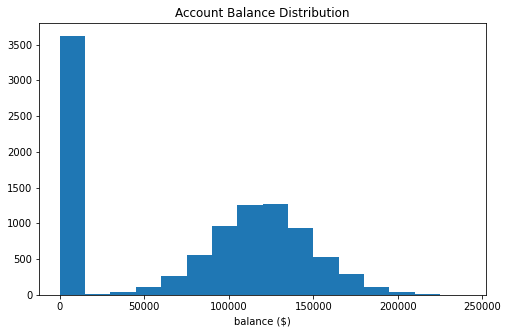

In [9]:
#sns.set_style('darkgrid')
plt.figure(figsize=[8, 5])
binsize=15000
bins=np.arange(0, data['balance'].max()+1000, binsize)
plt.hist(data=data,x='balance', bins=bins);
#plt.xlim(0, 230000)
plt.xlabel('balance ($)');
plt.title('Account Balance Distribution');

###  Proportions of churned and retained clients
20 percent of the client base quit business with the bank and 80% are still doing business with the bank.

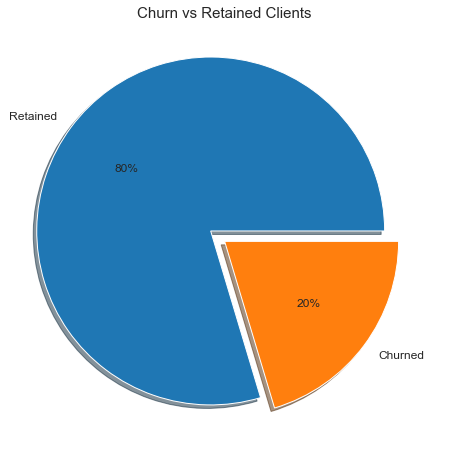

In [47]:
churn=data['exited']
labs={0:'Retained', 1:'Churned'}
props=churn.value_counts().index.map(labs)
explode=(0.1,0)
plt.gcf().set_size_inches(18, 8)
churn.value_counts().plot(kind='pie',ylabel='',labels=props ,autopct='%.0f%%',textprops={'size': 'large'},shadow=True,explode=explode);
plt.title('Proportions of Churned and Retained Clients', size=15)
plt.show()

### Proportions of clients by membership status
The proportion of active and dormant members is almost equal, at 52% and 48% respectively. Too close.  

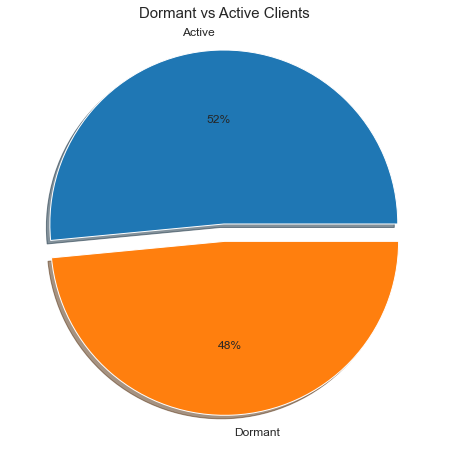

In [48]:
active=data['isactivemember']
labs={0:'Dormant', 1:'Active'}
props=active.value_counts().index.map(labs)
explode=(0.1,0)
plt.gcf().set_size_inches(18, 8)
active.value_counts().plot(kind='pie',ylabel='',labels=props ,autopct='%.0f%%',textprops={'size': 'large'},shadow=True,explode=explode);
plt.title('Proportions of Dormant and Active Clients', size=15)
plt.show()

### Number of products vs Churn status 
Interestingly only a very small percentage of clients with two products exited. Clients with 4 products are the least and all of them exited. Largest proportion of clients with 3 products exited. Besides, more than  a quater of clients with one product exited. I will compute correlation between number of products and exited. 

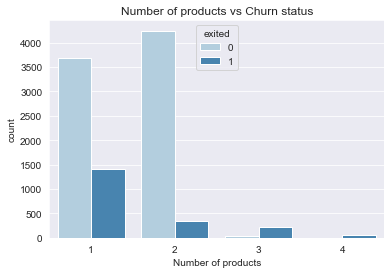

In [20]:
sns.countplot(data=data, x='numofproducts',hue='exited', palette='Blues');
plt.xlabel('Number of products')
plt.title('Number of products vs Churn status');

### Bank balance distribution by churn status and number of products
Churned clients have slightly higher bank account balance than their counterparts. Majority of clients who stay have a 0.00 account balance. Clients with 2 products have the least account balance, and the largest proportion of them have 0.00 balance while those with 4 products have the highest balance and very few of them have 0.00 balance. Clients with 1 product have high account balance and majority have a balance between 100k and 150k while very few have 0.00 account balance.

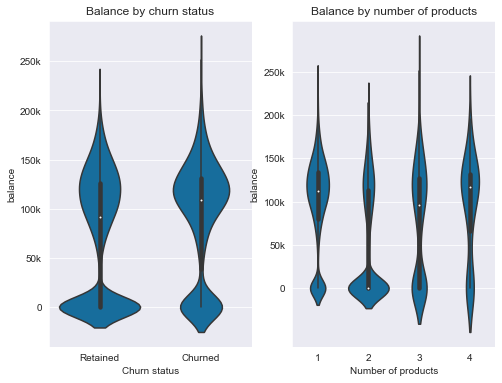

In [34]:
fig, ax=plt.subplots(ncols=2, figsize=(8,6))
sns.violinplot(data=data, y='balance', x='exited',ax=ax[0], palette=color)
ax[0].set_yticks([0, 5e4,100e3,150e3,200e3, 250e3]);
ax[0].set_xticks([0,1],['Retained', 'Churned'])
ax[0].set_yticklabels([0, '50k','100k','150k','200k', '250k']);
ax[0].set_title('Balance by churn status')
ax[0].set_xlabel('Churn status')

sns.violinplot(data=data, y='balance', x='numofproducts',ax=ax[1],palette=color)
ax[1].set_yticks([0, 5e4,100e3,150e3,200e3, 250e3]);
ax[1].set_yticklabels([0, '50k','100k','150k','200k', '250k']);
ax[1].set_title('Balance by number of products')
ax[1].set_title('Balance by number of products')
ax[1].set_xlabel('Number of products')
plt.show()


### Age distribution by churn status and number of products 
large proportion of churned clients are about 40-50 years old. The oldest churned clients is 70 years. most of the retained clients are 30-40 years and the oldest slightly below 60 years. clients with 1 and 2 products are on average slightly below 40 years probably because very few from these groups churned. Clients with 3 and 4 products are on average slightly above 40 years probably because most of churned clients are from these two groups, this confirms that churned clients are about 40-50 years, the bank should watch this clients 40+ years and maybe come up with products or deals that might retain these clients.  


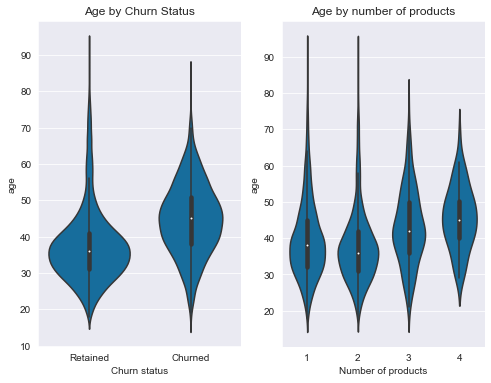

In [35]:
fig, ax=plt.subplots(ncols=2, figsize=(8,6))
sns.violinplot(data=data, y='age',x='exited', ax=ax[0],palette=color);
ax[0].set_title('Age by Churn Status')
ax[0].set_xticks([0,1],['Retained', 'Churned'])
ax[0].set_xlabel('Churn status')
sns.violinplot(data=data, y='age',x='numofproducts', ax=ax[1],palette=color);
ax[1].set_title('Age by number of products')
ax[1].set_xlabel('Number of products')
plt.show()

## Conclusion:


All clients with 4 products quit business with the bank. Besides, these clients have a higher account balance compared to those who purchase any other number of products. All clients with 4 products are on average 45 years old. 

Majority of the clients who purchased two products have on average 0.00 account balance. A very small proportion of these clients left. 

Average age for churned clients is about 45-50 years old while that of retained  clients is between 35-40. 

churned clients have on average higher account balance than retained clients. Majority of the retained clients have 0.00 account balance, while minority have on average account balance below 100k. Very few churned clients have 0.00 account balance, and their balance is on average above 100k. 

48 percent of the clients in this bank are dormant. 
20 percent of the clients are no longer doing business with the bank. A huge loss to the bank.

## Recommendation: 
The bank should put measures that retain clients above 40 years and those purchasing 3 & 4 products and perhaps investigage what products they purchase. Since most of the churned clients are above 40 years, the bank should come up with products tailored for 40+ years clients. 

Any client with account balance above 100K should be under the bank's watch as these are valuable (monetary terms) clients and are more likely to churn.

The bank should dig deeper to understand why clients with high bank balance are more likely to churn. could be poor products by the bank? is it poor customer service?

A large proportion of clients are dormant, the bank should entice them with products and deals that ensure this lot is active. 

# END

In [47]:
!jupyter nbconvert presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook presentation.ipynb to slides
[NbConvertApp] Writing 773974 bytes to presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\RONNY\miniconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\RONNY\miniconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\RONNY\miniconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\RONNY\miniconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\RONNY\miniconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\User